In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

In [3]:
# How to read a csv file with no column names and set the names of the Dtaframe
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("data/diabetes.csv", header=None, names=col_names)

feature_names = col_names[:-1]

# print(type(df))
print(df.shape)
df.head()


(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Explore the data

In [4]:
# Numeric variables
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Target variable
print(df.label.value_counts())

label
0    500
1    268
Name: count, dtype: int64


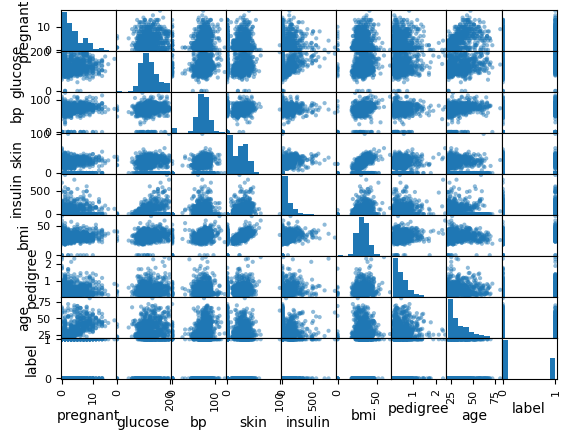

In [6]:
# scatter matrix
scatter_matrix(df)
plt.show()

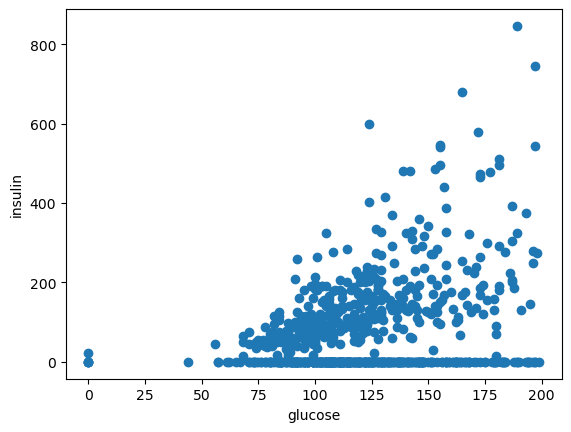

In [7]:
# Lets have a closer look at glucose and insulin
plt.scatter(df.glucose, df.insulin)
plt.xlabel("glucose")
plt.ylabel("insulin")
plt.show()

**Hard to see a separation**

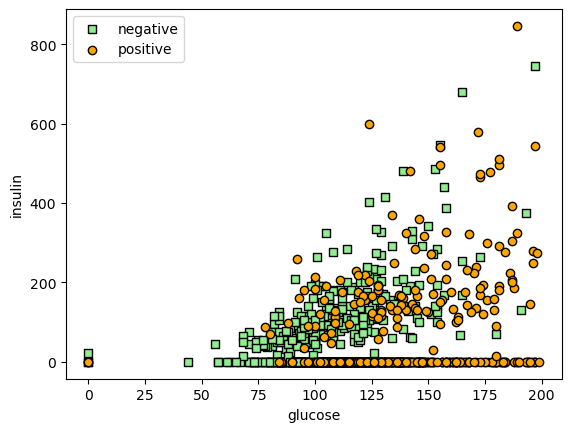

In [8]:
d = df.to_numpy()
# Do glucose (index 1) and insulin (index 4) seperate the classes? 

plt.scatter(
    d[d[:,8] == 0, 1], d[d[:,8] == 0, 4],
    c='lightgreen', marker='s', edgecolor='black',
    label='negative'
)


plt.scatter(
    d[d[:,8] == 1, 1], d[d[:,8] == 1, 4],
    c='orange', marker='o', edgecolor='black',
    label='positive'
)

plt.xlabel('glucose')
plt.ylabel('insulin')
plt.legend(loc="upper left")

plt.show()

### Build a model

In [9]:
X = df.drop("label", axis='columns')
y = df.label
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [10]:
# Split inot 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


In [11]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()
# tree = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
model.fit(X_train,y_train)
print(model.get_depth())

16


In [13]:
# Training Accuracy
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.7012987012987013


In [15]:
#Predict the response for test dataset
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.7012987012987013


In [16]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[117  29]
 [ 40  45]]

TN 117 FP 29 FN 40 TP 45


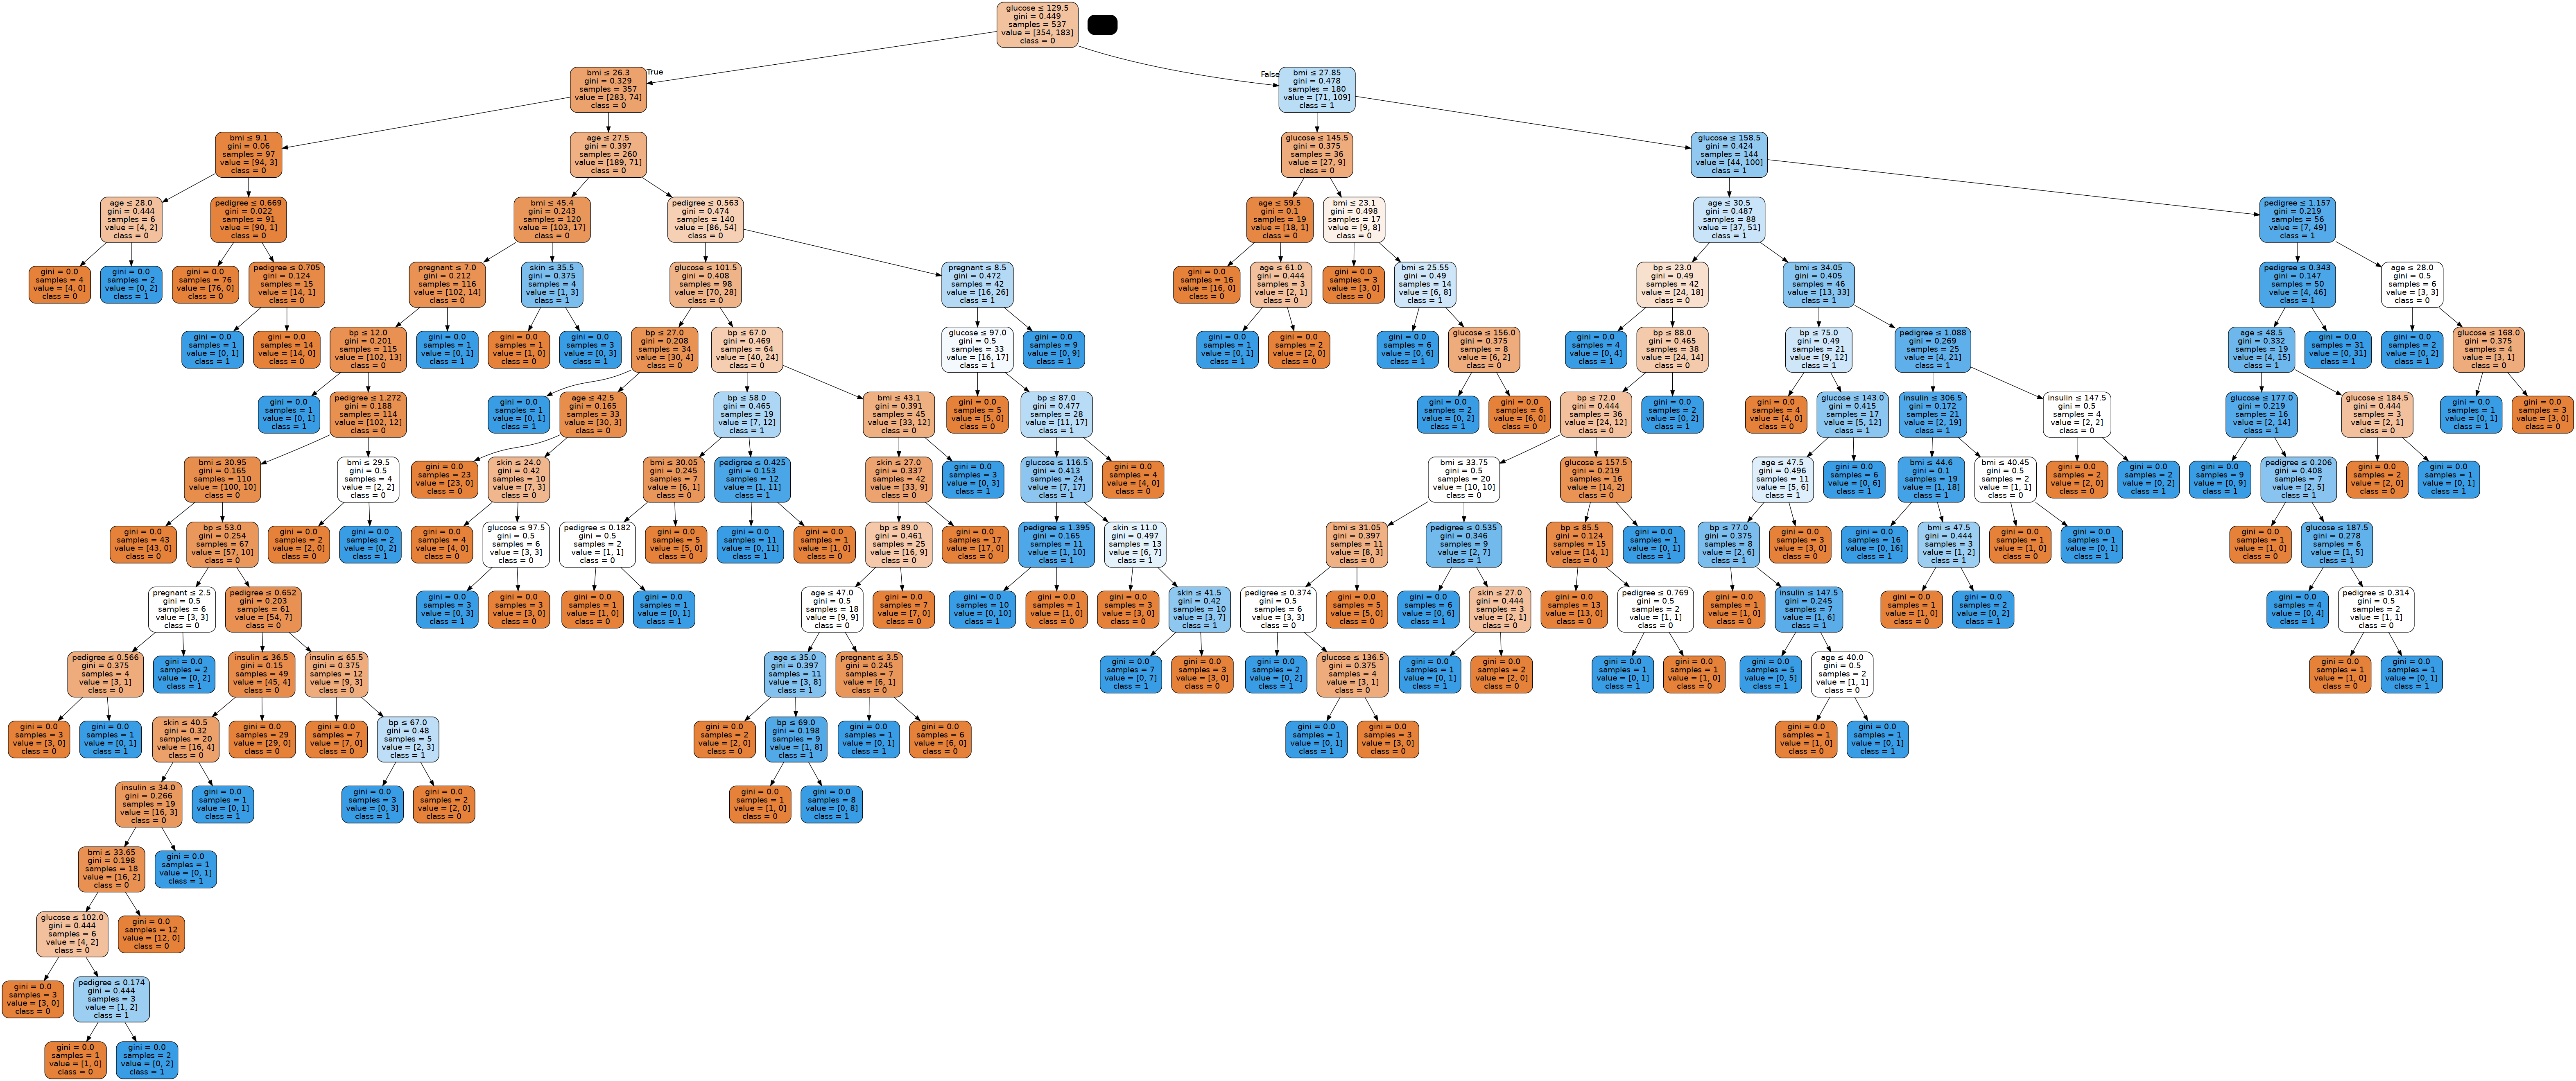

In [18]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/diabetes.png')
Image(graph.create_png())

### Restrict depth of Decision Tree

In [19]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
model.fit(X_train,y_train)
print(model.get_depth())

5


In [20]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.8268156424581006
Test Accuracy: 0.7619047619047619
